# 1 
---> for문 사용해서 알고리즘 비교

* 1. 데이터 불러오기

In [1]:
import pandas as pd
df = pd.read_csv('c:/vscode/data/school/data.csv')
df.head(5)

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


-> label 컬럼 : total_score를 평균값 기준으로 0/1로 표시한 것.

* 2. 컬럼 분류

In [2]:
train_cols = df.columns[0:8]
X = df[train_cols]
y = df['Label']
print(train_cols)

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international_students'],
      dtype='object')


In [3]:
df['Label'].value_counts()

0    2158
1     445
Name: Label, dtype: int64

-> 종속변수가 불균형 데이터이므로, 언더샘플링 필요.

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류/n (0: bad, 1:good)')

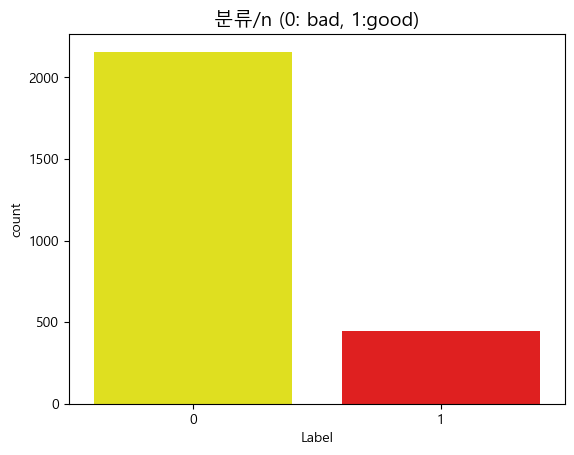

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글 폰트 설정
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

# 불균형 데이터 시각화
import seaborn as sns
colors = ['yellow', 'red']
sns.countplot('Label', data=df, palette=colors)
plt.title('분류/n (0: bad, 1:good)', fontsize=14)

* 3. 언더샘플링

In [5]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Label'])
df_samp = pd.concat([X_samp, y_samp], axis=1)
df_samp['Label'].value_counts()

0    445
1    445
Name: Label, dtype: int64

* 4. 독립변수, 종속변수 재지정

In [ ]:
X=df_samp[train_cols]
y=df_samp["Label"]

* 5. 데이터셋 나누기

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

* 6. 여러 방법으로 분류하기

In [7]:
# 스케일링 안 한 데이터로 로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=10,max_iter=1000)
logit.fit(X_train, y_train)
print("학습용:",logit.score(X_train, y_train))
print("검증용:",logit.score(X_test, y_test))

학습용: 0.9034582132564841
검증용: 0.9213051823416507


---------------------------------------------

In [38]:
#다양한 알고리즘별 정확도를 저장할 리스트
result_tr=[]
result_te=[]

In [39]:
# 스케일링
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

---------------------------------------------

In [40]:
# 1) 로지스틱 회귀분석
logit = LogisticRegression(random_state=10)
logit.fit(X_train_scaled, y_train)
score_tr=logit.score(X_train_scaled, y_train)
score_te=logit.score(X_test_scaled, y_test)
print("학습용:",score_tr)
print("검증용:",score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9951969260326609
검증용: 0.9961612284069098


In [42]:
# 2) DecisionTree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train_scaled, y_train)
print("학습용:",tree.score(X_train_scaled, y_train))
print("검증용:",tree.score(X_test_scaled, y_test))

학습용: 1.0
검증용: 0.9750479846449136


In [43]:
# 2-2) max_depth 가지치기
tree = DecisionTreeClassifier(max_depth=4, random_state=10)
tree.fit(X_train_scaled, y_train)
score_tr=tree.score(X_train_scaled, y_train)
score_te=tree.score(X_test_scaled, y_test)
print("학습용:",score_tr)
print("검증용:",score_te)

학습용: 0.9798270893371758
검증용: 0.980806142034549


In [45]:
# 2-3) 결과 저장
result_tr.append(score_tr)
result_te.append(score_te)

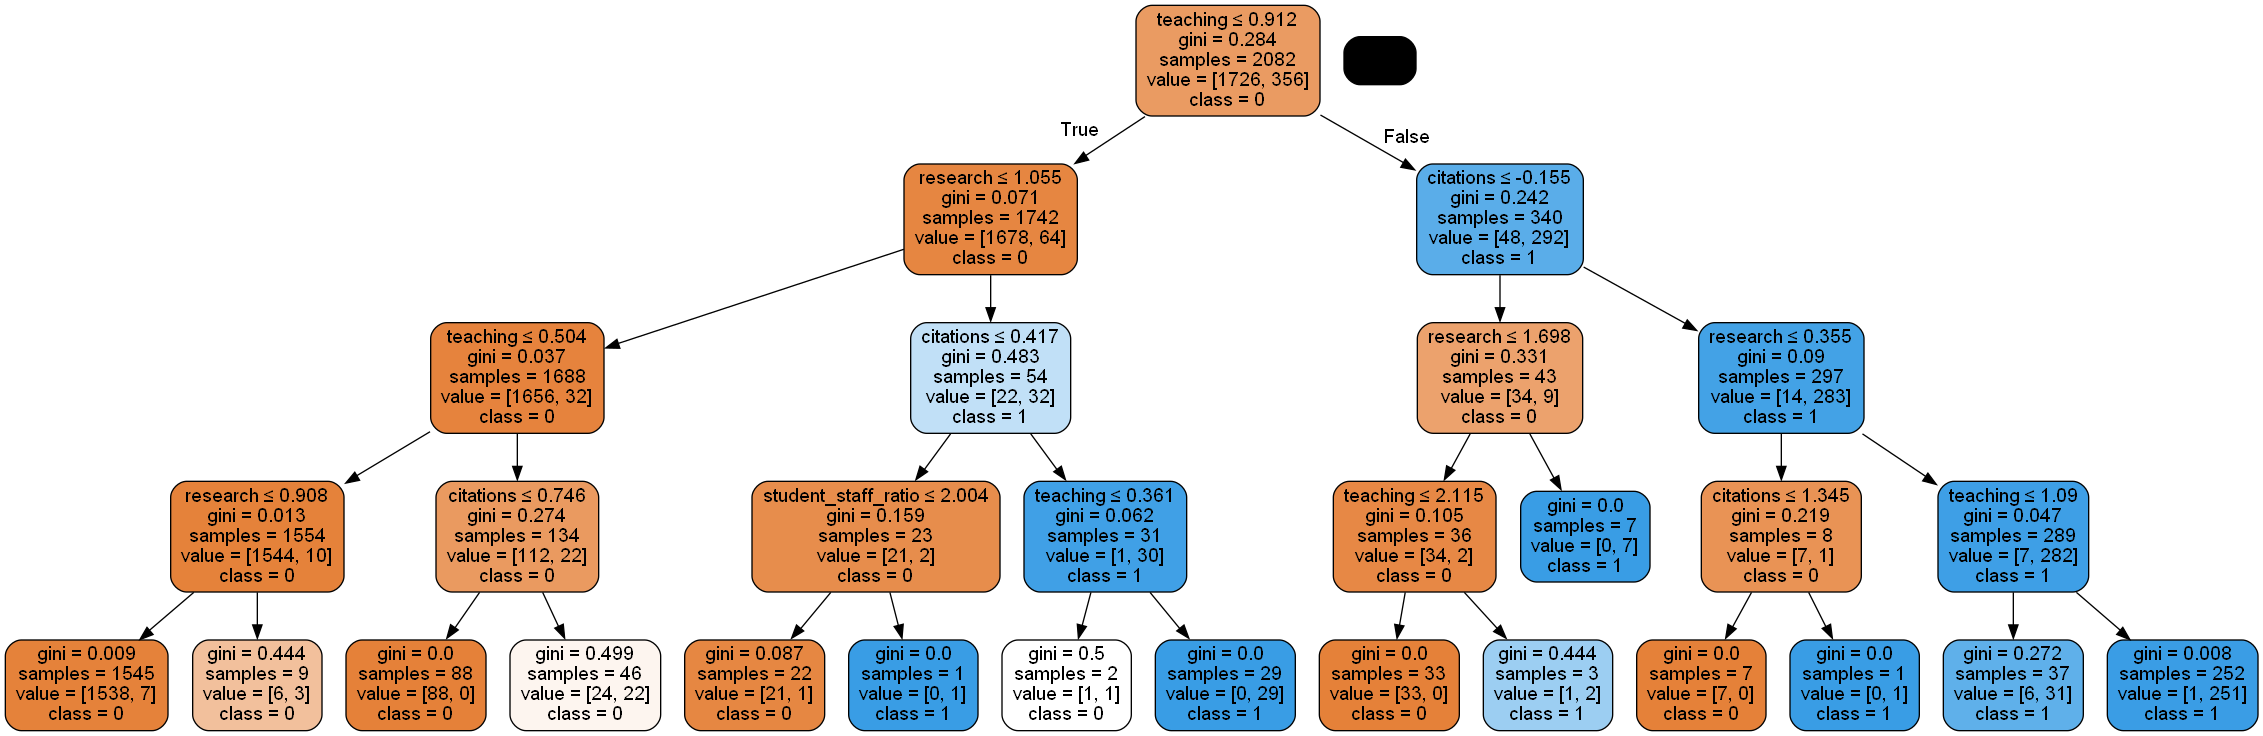

In [14]:
# 2-4) 트리모델 구성 그래프
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None,
feature_names=train_cols, class_names=["0","1"], filled=True,
rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

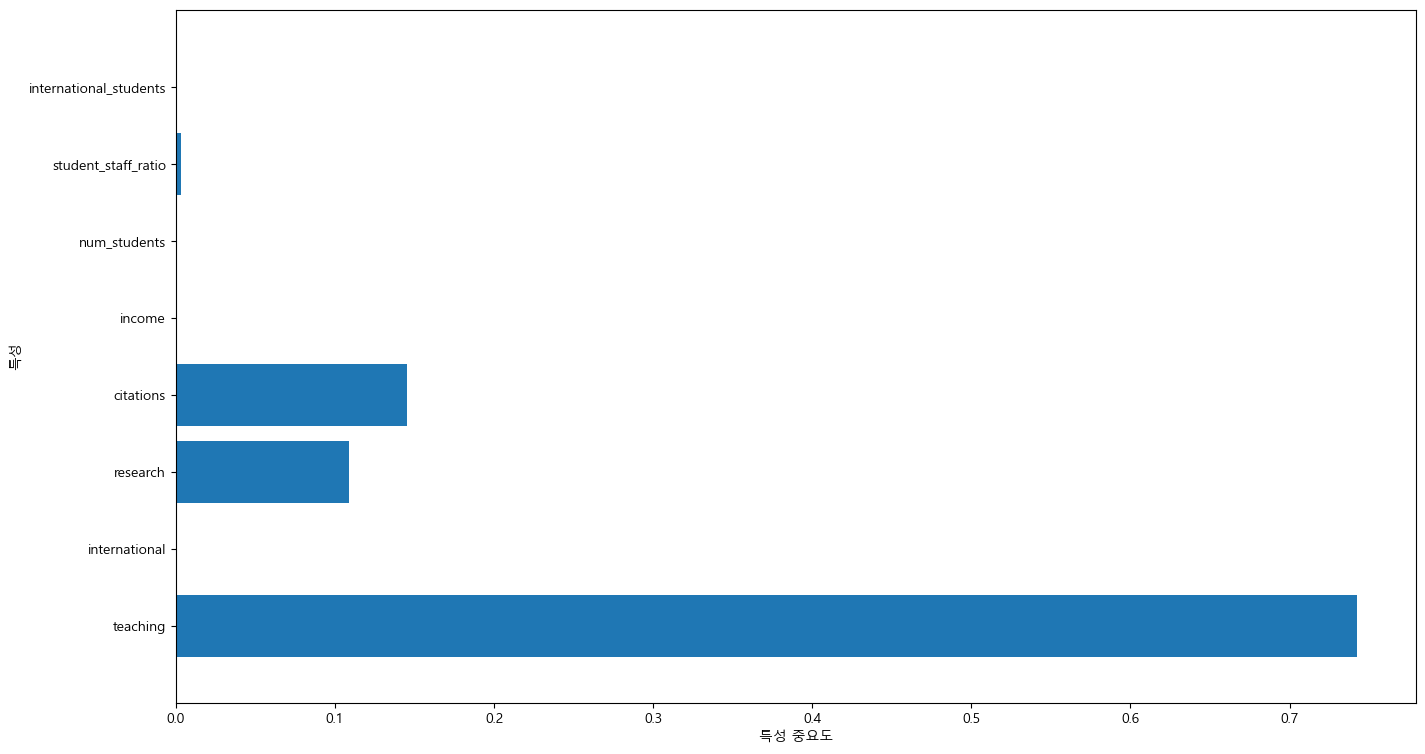

In [15]:
# 2-5) 특성 중요도 확인
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)
import numpy as np

def plot_tree(model):
    n_features = X.shape[1]
    plt.rcParams["figure.figsize"]=(16,9)
    plt.barh(range(n_features), model.feature_importances_,
    align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_tree(tree)

In [47]:
# 3) 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

#100개의 트리로 구성된 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=100, random_state=10)
forest.fit(X_train_scaled, y_train)
score_tr=forest.score(X_train_scaled, y_train)
score_te=forest.score(X_test_scaled, y_test)
print("학습용:",score_tr)
print("검증용:",score_te)

학습용: 1.0
검증용: 0.9904030710172744


In [48]:
# 3-2) 결과 저장
result_tr.append(score_tr)
result_te.append(score_te)

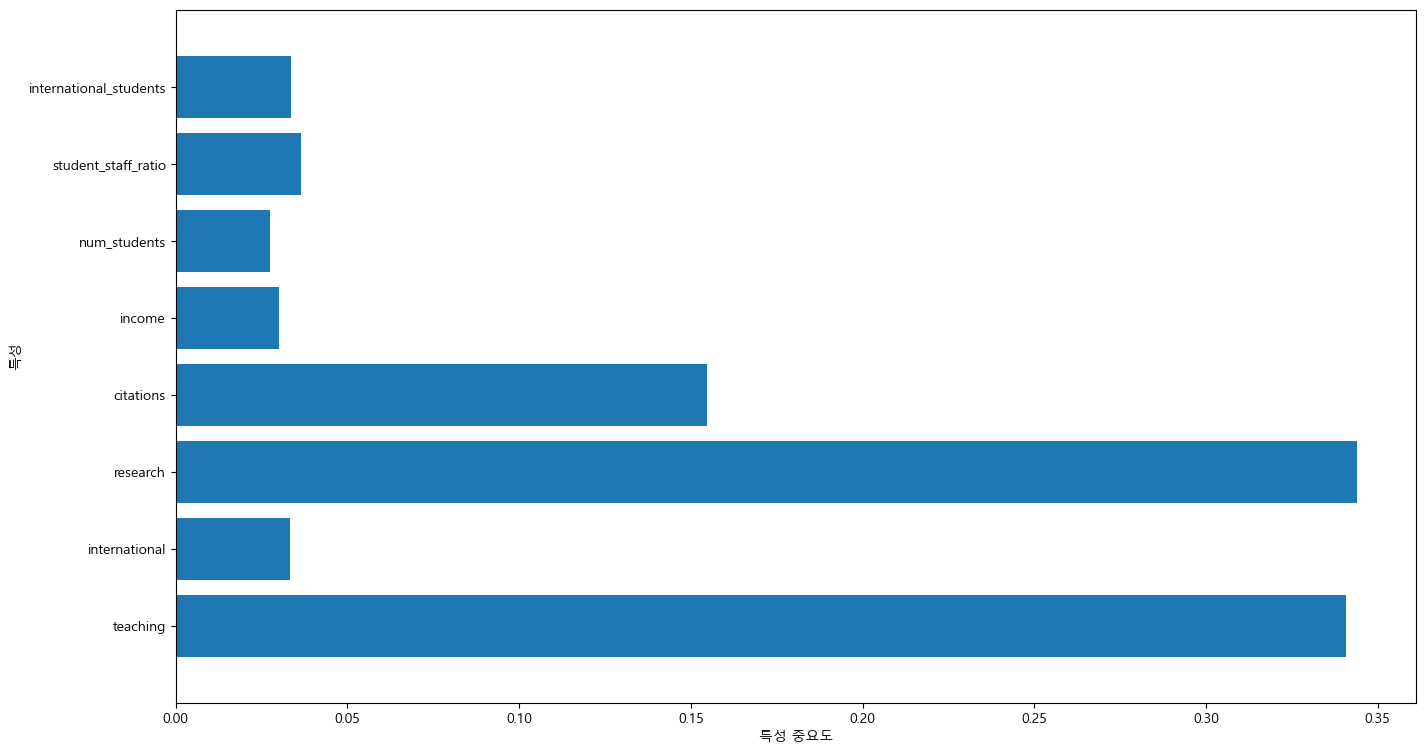

In [18]:
# 3-3) 특성 중요도 확인
#랜덤 포레스트에서 제공하는 각 트리의 특성 중요도
#랜덤 포레스트는 좀 더 폭넓은 시각으로 데이터를 관찰할 수 있다
plot_tree(forest)

In [49]:
# 4) knn
# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

train_rate = []
test_rate = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors = range(1, 11)
for n in neighbors:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train_scaled, y_train))
    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test_scaled, y_test))

test_arr=np.array(test_rate) #검증용 데이터셋의 정확도
max_rate=np.max(test_arr) #가장 좋은 정확도
idx=np.where(test_arr == max_rate)[0][0] #가장 성능이 좋은 인덱스
print("최적의 k:",neighbors[idx])
print("최고 정확도:",test_rate[idx])

c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

최적의 k: 5
최고 정확도: 0.9865642994241842


c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

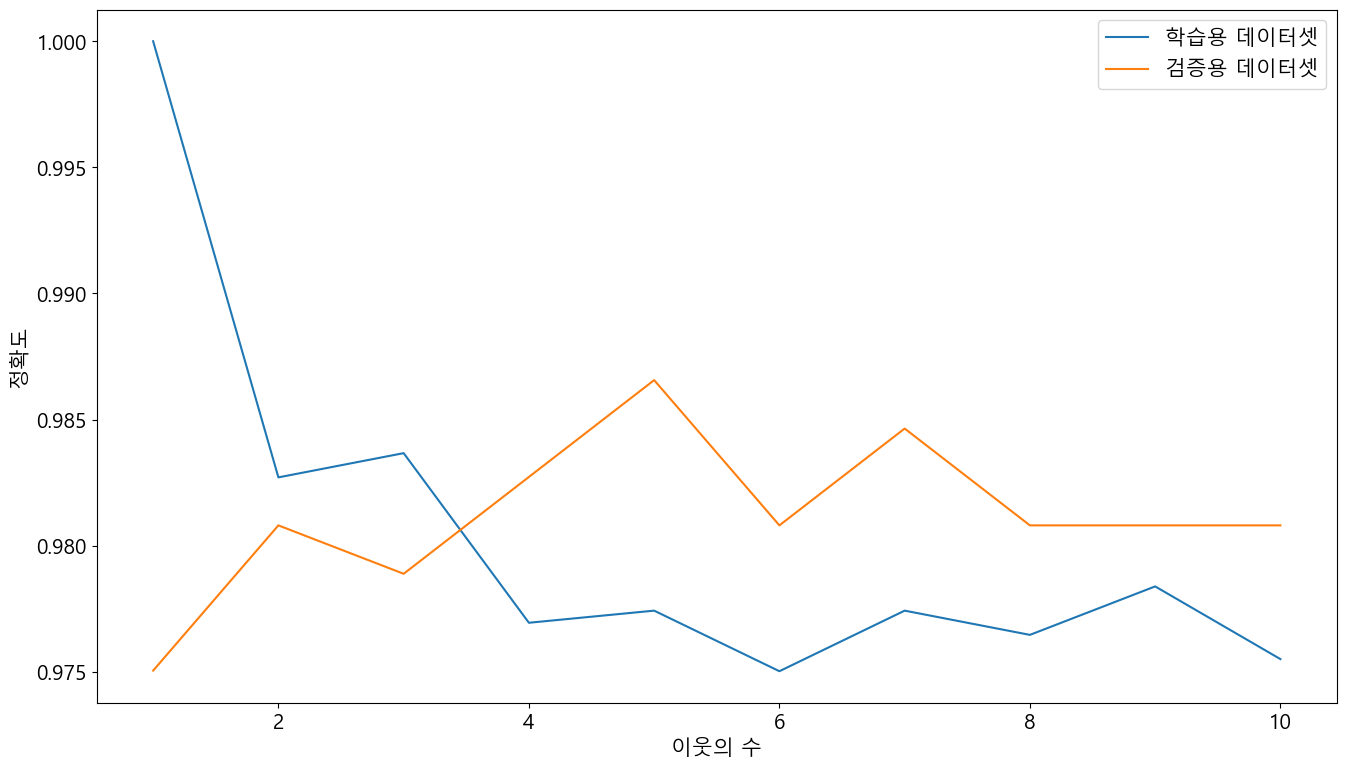

In [20]:
plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="학습용 데이터셋")
plt.plot(neighbors, test_rate, label="검증용 데이터셋")
plt.ylabel("정확도")
plt.xlabel("이웃의 수")
plt.legend()
#학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측
#이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다.

In [50]:
# 4-2) 모델 학습
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
score_tr=knn.score(X_train_scaled, y_train)
score_te=knn.score(X_test_scaled, y_test)
print("학습용:",score_tr)
print("검증용:",score_te)

학습용: 0.9774255523535063
검증용: 0.9865642994241842


c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

In [51]:
# 4-3) 결과 저장
result_tr.append(score_tr)
result_te.append(score_te)

In [52]:
# 5) 인공신경망
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=10)
mlp.fit(X_train_scaled, y_train)
score_tr=mlp.score(X_train_scaled, y_train)
score_te=mlp.score(X_test_scaled, y_test)
print("학습용:",score_tr)
print("검증용:",score_te)

학습용: 0.9985590778097982
검증용: 0.9961612284069098


c:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
# 5-2) 결과 저장
result_tr.append(score_tr)
result_te.append(score_te)

In [54]:
# 6) svm
from sklearn.svm import SVC

svm = SVC(random_state=10)
svm.fit(X_train_scaled, y_train)
print("학습용:",svm.score(X_train_scaled, y_train))
print("검증용:",svm.score(X_test_scaled, y_test))

학습용: 0.9903938520653218
검증용: 0.9923224568138196


In [29]:
# 6-2) 최적의 C value와 gamma value를 찾는 과정
import numpy as np
train_rate = []
test_rate = []
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]

for n in c_values:
    for g in g_values:
        # 모델 생성
        svm = SVC(C=n,gamma=g,random_state=10)
        svm.fit(X_train_scaled, y_train)
        # 학습용 데이터셋의 정확도
        train_rate.append([n,g,svm.score(X_train_scaled, y_train)])
        # 검증용 데이터셋의 정확도
        test_rate.append([n,g,svm.score(X_test_scaled, y_test)])

train_arr=np.array(train_rate) #검증용 데이터셋의 정확도
test_arr=np.array(test_rate) #검증용 데이터셋의 정확도
max_rate=np.max(test_arr[:,2]) #가장 좋은 정확도
idx=np.argmax(test_arr[:,2]) #가장 성능이 좋은 인덱스
print("최적의 c:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최고 정확도:",test_rate[idx][2])

최적의 c: 1000
최적의 gamma: 0.001
최고 정확도: 0.9961612284069098


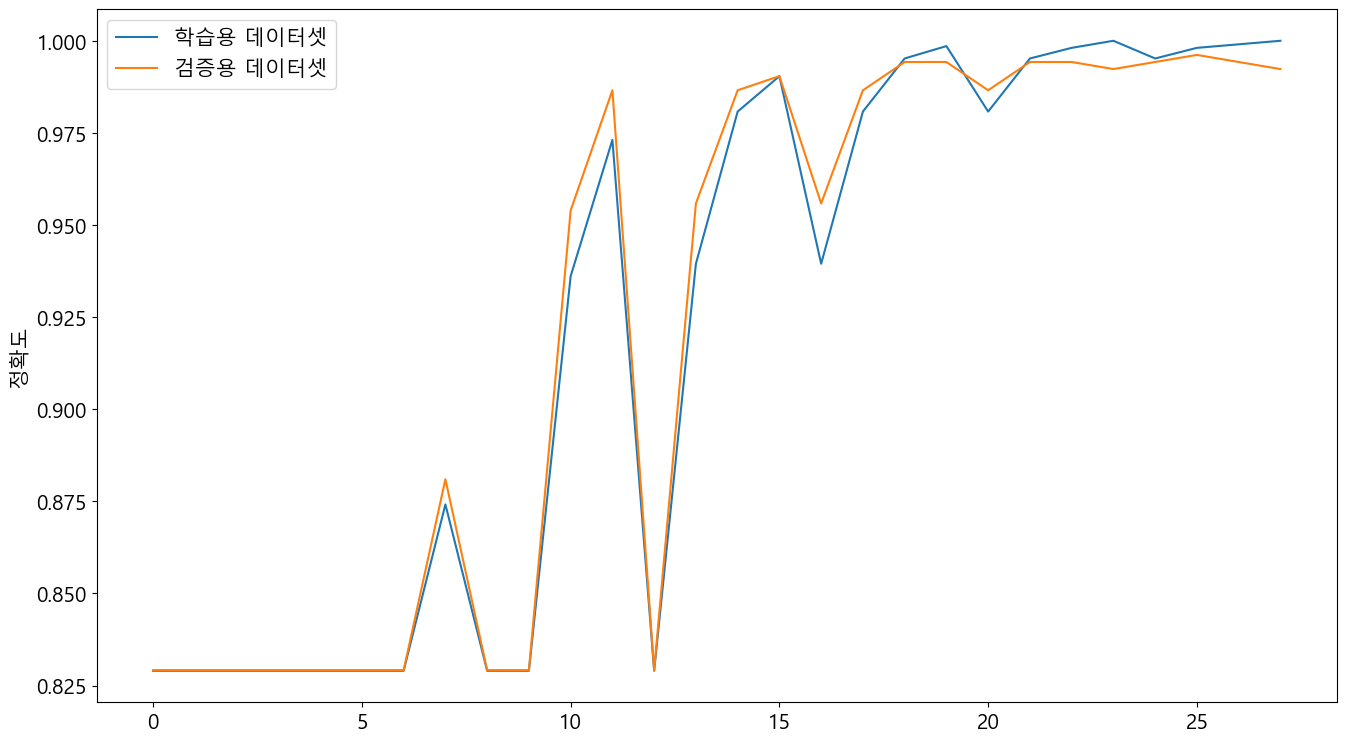

In [30]:
plt.rcParams["font.size"]=15
plt.plot(range(len(train_rate)), train_arr[:,2], label="학습용 데이터셋")
plt.plot(range(len(test_rate)), test_arr[:,2], label="검증용 데이터셋")
plt.ylabel("정확도")
plt.legend()

In [55]:
# 6-3) 최적의 c/gamma 값 적용
from sklearn.svm import SVC

svm = SVC(C=1000,gamma=0.001,random_state=10)
svm.fit(X_train_scaled, y_train)
score_tr=svm.score(X_train_scaled, y_train)
score_te=svm.score(X_test_scaled, y_test)
print("학습용:",score_tr)
print("검증용:",score_te)

학습용: 0.9980787704130644
검증용: 0.9961612284069098


In [56]:
# 6-4) 결과 저장
result_tr.append(score_tr)
result_te.append(score_te)

In [62]:
# 7) keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(64,input_shape=(X.shape[1],),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
sgd = SGD(learning_rate=0.01)  
model.compile(loss='binary_crossentropy',
                optimizer=sgd,
                metrics=['accuracy'])

In [58]:
# 모델 학습
hist = model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
66/66 [==============================] - 1s 4ms/step - loss: 0.3368 - accuracy: 0.9006
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1127 - accuracy: 0.9630
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0745 - accuracy: 0.9693
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0594 - accuracy: 0.9760
Epoch 5/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0509 - accuracy: 0.9769
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9846
Epoch 7/100
66/66 [==============================] - 0s 5ms/step - loss: 0.0390 - accuracy: 0.9851
Epoch 8/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.9846
Epoch 9/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.9875
Epoch 10/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0363 - accuracy: 0.9866
Epoch 11/

In [63]:
# 7-2) 조기학습종료 모델
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

es = EarlyStopping(monitor='val_loss', patience=5)
                    # 종료기준,         임계값

# 학습 과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장
mc = ModelCheckpoint("school_best.h5", save_best_only=True)
                        # 모형이름,    최적의 모형만 선택

# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션
rlr = ReduceLROnPlateau(factor=0.1, patience=5)     # 기존 학습률*factor(배수)
                    # 학습률 간격 조절, 임계값   

# 학습 과정의 주요 history를 csv로 저장
csvlogger = CSVLogger("mylog.csv")  

# 학습
hist = model.fit(X_train_scaled, y_train, validation_split=0.2, 
                epochs=500, callbacks=[es, mc, rlr, csvlogger])

Epoch 1/500
53/53 [==============================] - 1s 8ms/step - loss: 0.6081 - accuracy: 0.7586 - val_loss: 0.5219 - val_accuracy: 0.8393 - lr: 0.0100
Epoch 2/500
53/53 [==============================] - 0s 7ms/step - loss: 0.4699 - accuracy: 0.8517 - val_loss: 0.4170 - val_accuracy: 0.8873 - lr: 0.0100
Epoch 3/500
53/53 [==============================] - 0s 6ms/step - loss: 0.3824 - accuracy: 0.8823 - val_loss: 0.3431 - val_accuracy: 0.9065 - lr: 0.0100
Epoch 4/500
53/53 [==============================] - 0s 6ms/step - loss: 0.3183 - accuracy: 0.9147 - val_loss: 0.2879 - val_accuracy: 0.9281 - lr: 0.0100
Epoch 5/500
53/53 [==============================] - 0s 6ms/step - loss: 0.2698 - accuracy: 0.9363 - val_loss: 0.2466 - val_accuracy: 0.9520 - lr: 0.0100
Epoch 6/500
53/53 [==============================] - 0s 6ms/step - loss: 0.2329 - accuracy: 0.9483 - val_loss: 0.2152 - val_accuracy: 0.9736 - lr: 0.0100
Epoch 7/500
53/53 [==============================] - 0s 5ms/step - loss: 0.2

-> mylog.csv로 히스토리 저장 / 
-> school_best.h5로 최적의 모델 저장됨

In [64]:
# 저장한 모델 불러오기 가능
from keras.models import load_model
model=load_model('school_best.h5')  
model.evaluate(X_test_scaled, y_test, verbose=0)

[0.033017903566360474, 0.9884836673736572]

In [59]:
# 7-3) 결과 저장
loss, acc_tr = model.evaluate(X_train_scaled, y_train, verbose=0)
loss, acc_te = model.evaluate(X_test_scaled, y_test, verbose=0)
print(acc_tr)
print(acc_te)
result_tr.append(acc_tr)
result_te.append(acc_te)

1.0
0.9942418336868286


7. 알고리즘별 예측도 그래프

['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM', 'DNN']
[0.9951969260326609, 0.9798270893371758, 1.0, 0.9774255523535063, 0.9985590778097982, 0.9980787704130644, 1.0]
[0.9961612284069098, 0.980806142034549, 0.9904030710172744, 0.9865642994241842, 0.9961612284069098, 0.9961612284069098, 0.9942418336868286]
최적의 모형(학습용): RF
최고 정확도(학습용): 1.0
최적의 모형(검증용): LOGIT
최고 정확도(검증용): 0.9961612284069098


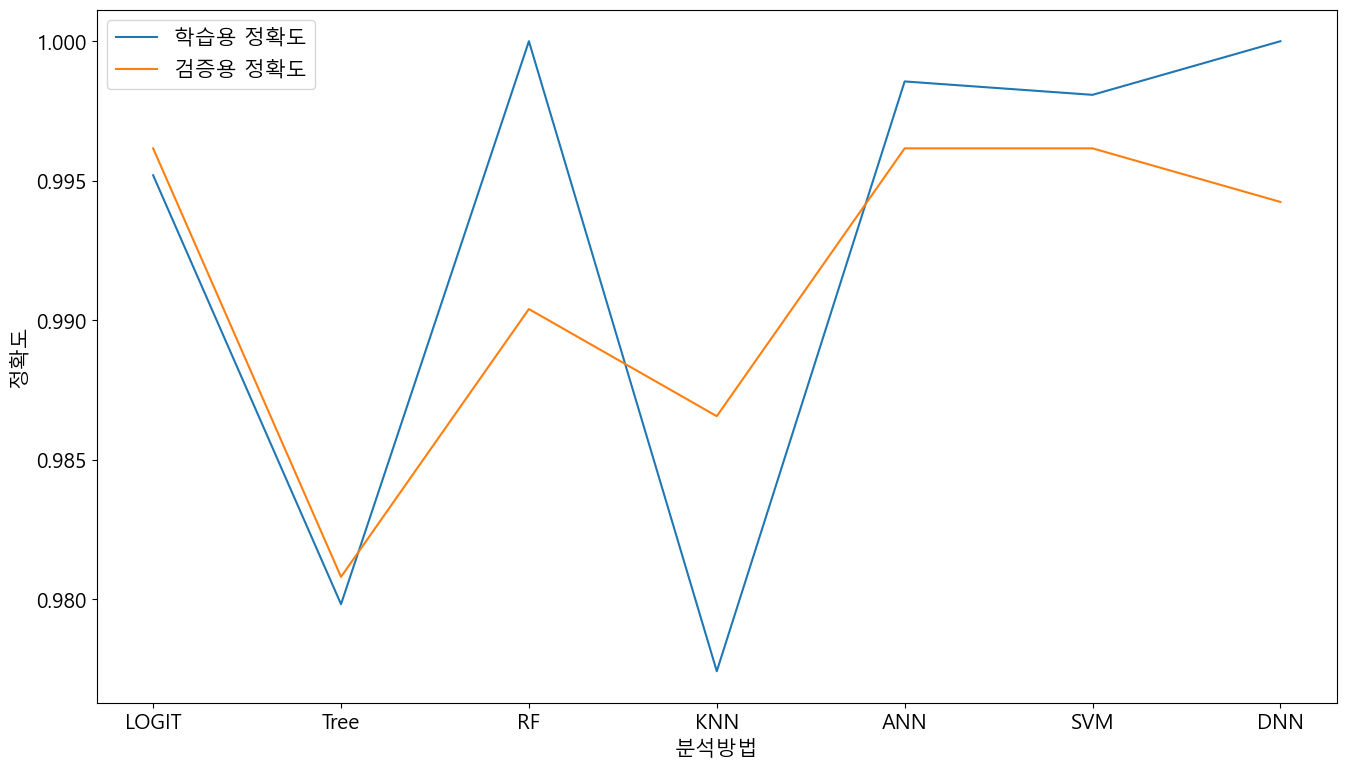

In [60]:
methods=["LOGIT","Tree","RF","KNN","ANN","SVM","DNN"]

result_tr_arr = np.array(result_tr) #검증용 데이터셋의 정확도
max_rate_tr = np.max(result_tr_arr) #가장 좋은 정확도
idx_tr = np.argmax(result_tr_arr) #가장 성능이 좋은 인덱스
result_te_arr = np.array(result_te) #검증용 데이터셋의 정확도
max_rate_te = np.max(result_te_arr) #가장 좋은 정확도
idx_te = np.argmax(result_te_arr) #가장 성능이 좋은 인덱스

print(methods)
print(result_tr)
print(result_te)
print("최적의 모형(학습용):",methods[idx_tr])
print("최고 정확도(학습용):",max_rate_tr)
print("최적의 모형(검증용):",methods[idx_te])
print("최고 정확도(검증용):",max_rate_te)

plt.rcParams["font.size"]=15
plt.plot(methods, result_tr_arr, label="학습용 정확도")
plt.plot(methods, result_te_arr, label="검증용 정확도")
plt.xlabel("분석방법")
plt.ylabel("정확도")
plt.legend()